In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

plt.rcParams["font.family"] = "Times"


In [3]:
bvas = pd.read_csv("../sandbox/BVAS_Ranked_Mutations.tsv", sep="\t")
bvas.rename(columns={"Run date": "Run_Date",
                     "Rank": "Rank_BVAS",
                     "PIP": "PIP_BVAS",
                     "Beta": "Beta_BVAS"},
                inplace=True)
bvas["Site"] = bvas["Unnamed: 0"].apply(lambda z: z.split(':')[0])
bvas["Mutation"] = bvas["Unnamed: 0"].apply(lambda z: z.split(':')[1])


bvas = bvas[["Run_Date", "Site", "Mutation", "PIP_BVAS", "Beta_BVAS", "Rank_BVAS"]]
bvas["Run_Date"] = pd.to_datetime(bvas["Run_Date"])
bvas

Run_Date   Site Mutation  PIP_BVAS  Beta_BVAS  Rank_BVAS
0      2021-03-12      S    L452R  1.000000   0.391635          1
1      2021-03-12      S    R346T  1.000000   0.595724          2
2      2021-03-12      S    R346K  1.000000   0.351070          3
3      2021-03-12      S    L452Q  1.000000   0.483694          4
4      2021-03-12      S    L452M  1.000000   0.462981          5
...           ...    ...      ...       ...        ...        ...
143183 2024-01-04  ORF10     L37F  0.003658   0.000000       3788
143184 2024-01-04   ORF8     S24L  0.003557   0.000000       3789
143185 2024-01-04  ORF1a   L3829F  0.002865  -0.000081       3790
143186 2024-01-04  ORF1a    T265I  0.002416  -0.000020       3791
143187 2024-01-04  ORF3a     Q57H  0.002218   0.000000       3792

[143188 rows x 6 columns]

In [4]:
pyro = pd.read_csv("../sandbox/PyR0_Ranked_Mutations.tsv", sep="\t")
pyro.rename(columns={"Δ log R": "LogR_Pyro",
                     "R / R_A": "Growth_Pyro",
                     "Run date": "Run_Date"},
            inplace=True)

pyro["Site"] = pyro["mutation"].apply(lambda z: z.split(':')[0])
pyro["Mutation"] = pyro["mutation"].apply(lambda z: z.split(':')[1])

pyro = pyro[["Run_Date", "Site", "Mutation", "LogR_Pyro", "Growth_Pyro"]]
pyro["Run_Date"] = pd.to_datetime(pyro["Run_Date"])
pyro["Rank_Pyro"] = pyro.groupby(["Run_Date"])["Growth_Pyro"].rank(ascending=False)
pyro

Run_Date   Site Mutation  LogR_Pyro  Growth_Pyro  Rank_Pyro
0      2021-03-12      S    N969K   0.180859     1.198250        7.0
1      2021-03-12      S    L452Q   0.164477     1.178780        9.0
2      2021-03-12      E      T9I   0.139596     1.149810       18.0
3      2021-03-12      S    Q954H   0.179024     1.196050        8.0
4      2021-03-12  ORF1b   I1566V   0.162685     1.176670       10.0
...           ...    ...      ...        ...          ...        ...
287959 2024-03-04  ORF1a    A876T  -0.118951     0.887851     3780.0
287960 2024-03-04      N    L219F  -0.076926     0.925959     3769.0
287961 2024-03-04  ORF3a    G251V  -0.149661     0.861000     3783.0
287962 2024-03-04      S    Q493R  -0.260846     0.770400     3786.0
287963 2024-03-04  ORF1b   N1191S  -0.071286     0.931196     3766.0

[287964 rows x 6 columns]

In [5]:
sorted(pyro[pyro["Run_Date"]=="2022-09-23T00:00:00.000000000"]["Rank_Pyro"].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139

In [6]:
bvas_top = list(bvas[bvas["Rank_BVAS"]<=5]["Mutation"].unique())
pyro_top = list(pyro[pyro["Rank_Pyro"]<=5]["Mutation"].unique())
hits = [x for x in bvas_top if x in pyro_top]
hits

['L452R', 'R346T', 'L452Q', 'L452M', 'F486V', 'E484K']

In [7]:
combined = pyro.merge(bvas, on=["Run_Date", "Site", "Mutation"], how="outer")
combined["Hits"] = combined["Mutation"].apply(lambda z: 1 if z in hits else 0)
combined["Site"] = pd.Categorical(combined["Site"], categories = ['S','N','M','E','ORF1a','ORF1b','ORF3a','ORF6','ORF7a','ORF7b','ORF8','ORF9b','ORF10','ORF14'], ordered = True)

# set up colour dictionary
strain_correspondence = combined[["Site", "Mutation"]].drop_duplicates()
mut_site = dict(zip(strain_correspondence["Mutation"], strain_correspondence["Site"]))
site_palette = dict(zip(combined["Site"].sort_values().unique(), sns.color_palette("husl",len(combined["Site"].unique())).as_hex()))
mut_palette = {key_A: site_palette[value_B] for key_A, value_B in mut_site.items() if value_B in site_palette}
combined


Run_Date   Site Mutation  LogR_Pyro  Growth_Pyro  Rank_Pyro  \
0      2021-03-12      S    N969K   0.180859      1.19825        7.0   
1      2021-03-12      S    L452Q   0.164477      1.17878        9.0   
2      2021-03-12      E      T9I   0.139596      1.14981       18.0   
3      2021-03-12      S    Q954H   0.179024      1.19605        8.0   
4      2021-03-12  ORF1b   I1566V   0.162685      1.17667       10.0   
...           ...    ...      ...        ...          ...        ...   
305852 2023-06-01  ORF1a   Q4189H        NaN          NaN        NaN   
305853 2023-06-01  ORF1a   L2524F        NaN          NaN        NaN   
305854 2023-06-01  ORF1a   P1321S        NaN          NaN        NaN   
305855 2023-06-01  ORF1b    F183V        NaN          NaN        NaN   
305856 2023-06-01  ORF1a   M2606I        NaN          NaN        NaN   

        PIP_BVAS  Beta_BVAS  Rank_BVAS  Hits  
0       0.999999   0.567784       14.0     0  
1       1.000000   0.483694        4.0     1  
2       0.999971   0.513508       20.0     0  
3       0.999999   0.567686       15.0     0  
4       0.999971   0.513686       19.0     0  
...          ...        ...        ...   ...  
305852  0.011713   0.000166     3034.0     0  
305853  0.009746   0.000000     3178.0     0  
305854  0.009710  -0.000335     3180.0     0  
305855  0.007546  -0.000544     3258.0     0  
305856  0.004267   0.000050     3299.0     0  

[305857 rows x 10 columns]

/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cis = grouped.apply(bootstrapped_cis)
/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

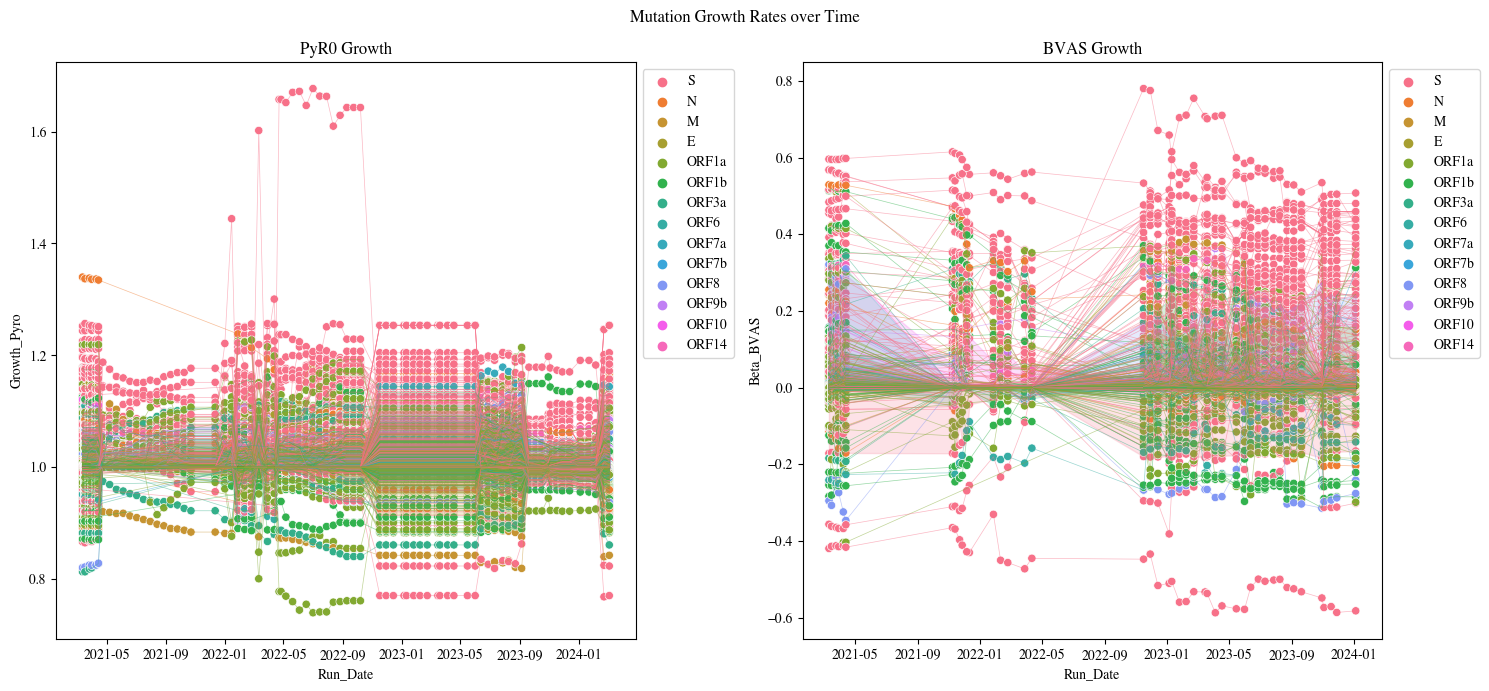

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

sns.scatterplot(data=combined,
                x="Run_Date",
                y="Growth_Pyro",
                hue="Site",
                palette=site_palette,
                ax=ax[0])
sns.lineplot(data=combined,
                x="Run_Date",
                y="Growth_Pyro",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[0])
#ax[0].set_ylim([max(combined["Rank_Pyro"]), -50])
ax[0].set_title("PyR0 Growth")
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))


sns.scatterplot(data=combined,
                x="Run_Date",
                y="Beta_BVAS",
                hue="Site",
                palette=site_palette,
                ax=ax[1])
sns.lineplot(data=combined,
                x="Run_Date",
                y="Beta_BVAS",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[1])
#ax[1].set_ylim([max(combined["Rank_BVAS"]), -50])
ax[1].set_title("BVAS Growth")
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.suptitle("Mutation Growth Rates over Time")
plt.tight_layout()

/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cis = grouped.apply(bootstrapped_cis)
/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

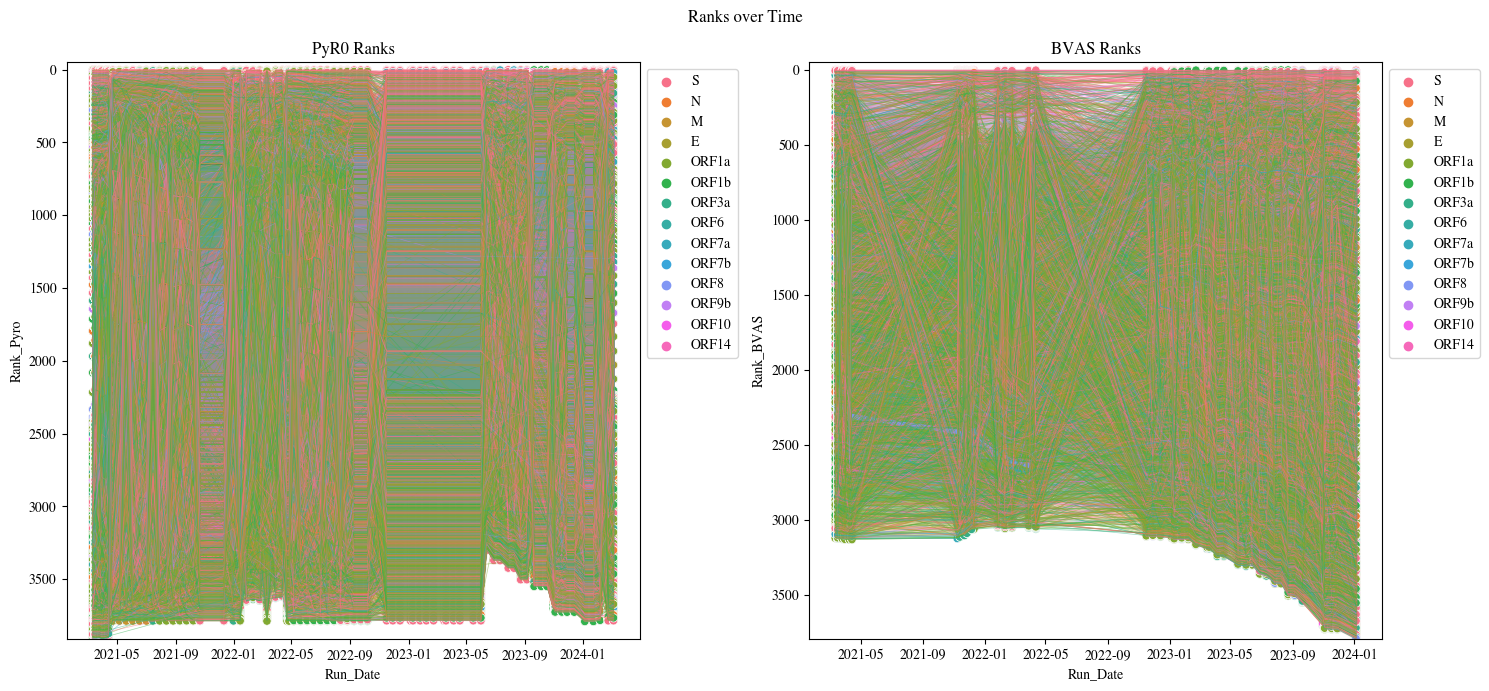

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

sns.scatterplot(data=combined,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Site",
                palette=site_palette,
                ax=ax[0])
sns.lineplot(data=combined,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[0])
ax[0].set_ylim([max(combined["Rank_Pyro"]), -50])
ax[0].set_title("PyR0 Ranks")
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))


sns.scatterplot(data=combined,
                x="Run_Date",
                y="Rank_BVAS",
                hue="Site",
                palette=site_palette,
                ax=ax[1])
sns.lineplot(data=combined,
                x="Run_Date",
                y="Rank_BVAS",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[1])
ax[1].set_ylim([max(combined["Rank_BVAS"]), -50])
ax[1].set_title("BVAS Ranks")
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.suptitle("Ranks over Time")
plt.tight_layout()

In [10]:
combined

Run_Date   Site Mutation  LogR_Pyro  Growth_Pyro  Rank_Pyro  \
0      2021-03-12      S    N969K   0.180859      1.19825        7.0   
1      2021-03-12      S    L452Q   0.164477      1.17878        9.0   
2      2021-03-12      E      T9I   0.139596      1.14981       18.0   
3      2021-03-12      S    Q954H   0.179024      1.19605        8.0   
4      2021-03-12  ORF1b   I1566V   0.162685      1.17667       10.0   
...           ...    ...      ...        ...          ...        ...   
305852 2023-06-01  ORF1a   Q4189H        NaN          NaN        NaN   
305853 2023-06-01  ORF1a   L2524F        NaN          NaN        NaN   
305854 2023-06-01  ORF1a   P1321S        NaN          NaN        NaN   
305855 2023-06-01  ORF1b    F183V        NaN          NaN        NaN   
305856 2023-06-01  ORF1a   M2606I        NaN          NaN        NaN   

        PIP_BVAS  Beta_BVAS  Rank_BVAS  Hits  
0       0.999999   0.567784       14.0     0  
1       1.000000   0.483694        4.0     1  
2       0.999971   0.513508       20.0     0  
3       0.999999   0.567686       15.0     0  
4       0.999971   0.513686       19.0     0  
...          ...        ...        ...   ...  
305852  0.011713   0.000166     3034.0     0  
305853  0.009746   0.000000     3178.0     0  
305854  0.009710  -0.000335     3180.0     0  
305855  0.007546  -0.000544     3258.0     0  
305856  0.004267   0.000050     3299.0     0  

[305857 rows x 10 columns]

In [11]:
combined["AvgRank_Pyro"] = combined.groupby(["Site", "Run_Date"])["Rank_Pyro"].transform("mean")
combined["MaxRank_Pyro"] = combined.groupby(["Site", "Run_Date"])["Rank_Pyro"].transform("min")

combined["AvgRank_BVAS"] = combined.groupby(["Site", "Run_Date"])["Rank_BVAS"].transform("mean")
combined["MaxRank_BVAS"] = combined.groupby(["Site", "Run_Date"])["Rank_BVAS"].transform("min")

combined_reduced = combined[["Run_Date", "Site", "AvgRank_Pyro", "MaxRank_Pyro", "AvgRank_BVAS", "MaxRank_BVAS"]].drop_duplicates().reset_index(drop=True)

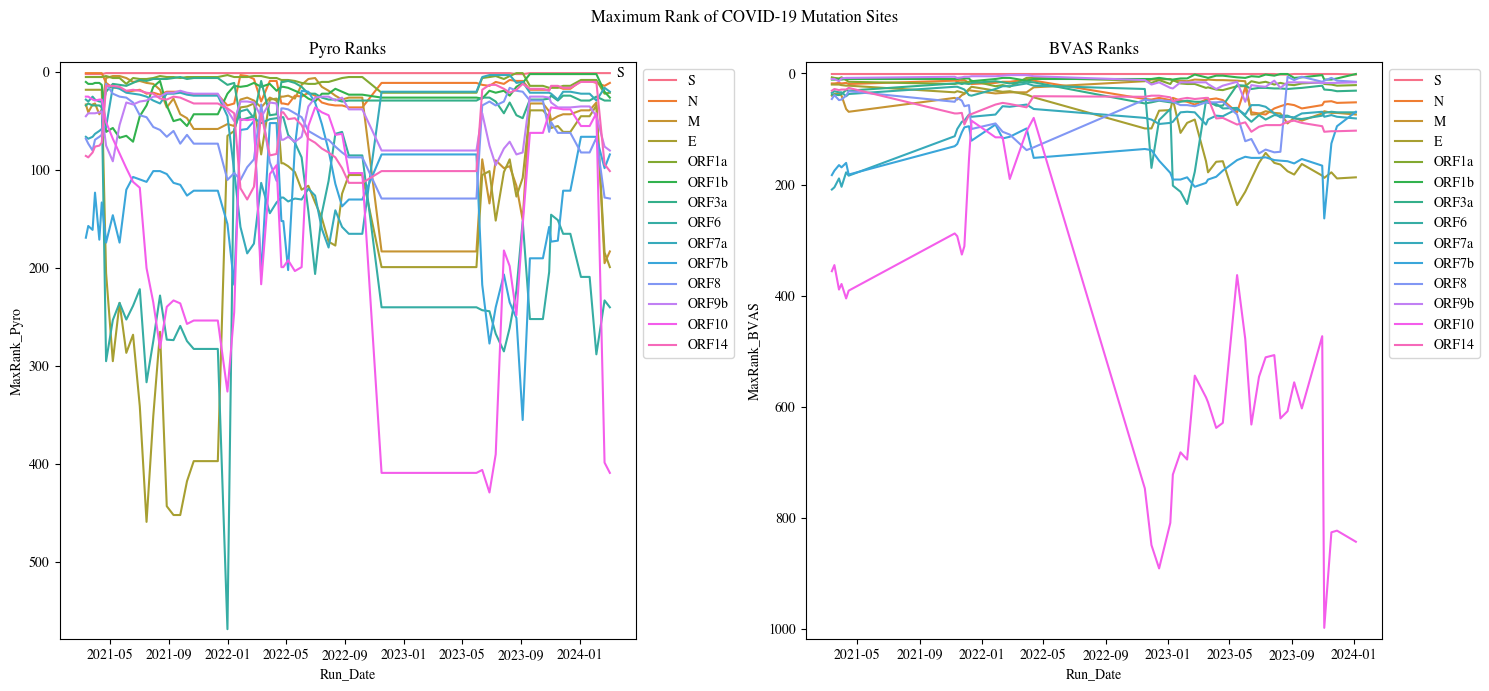

In [12]:

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

sns.lineplot(data = combined_reduced,
                x = "Run_Date",
                y = "MaxRank_Pyro",
                hue = "Site",
                ax=ax[0])
ax[0].set_ylim([max(combined_reduced["MaxRank_Pyro"])+10, -10])
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[0].set_title("Pyro Ranks")

sns.lineplot(data = combined_reduced,
                x = "Run_Date",
                y = "MaxRank_BVAS",
                hue = "Site",
                ax=ax[1])
ax[1].set_ylim([max(combined_reduced["MaxRank_BVAS"])+20, -20])
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[1].set_title("BVAS Ranks")

for index, row in combined_reduced.iterrows():
    if ((row['Run_Date']==max(combined_reduced['Run_Date']))&(row['Site']=='S')):
        ax[0].annotate(f'{row["Site"]}', (row['Run_Date'], row['MaxRank_Pyro']),
                       textcoords="offset points", xytext=(10, -3), ha='right')
        ax[1].annotate(f'{row["Site"]}', (row['Run_Date'], row['MaxRank_BVAS']),
                       textcoords="offset points", xytext=(10, -3), ha='right')

plt.suptitle("Maximum Rank of COVID-19 Mutation Sites")
plt.tight_layout()

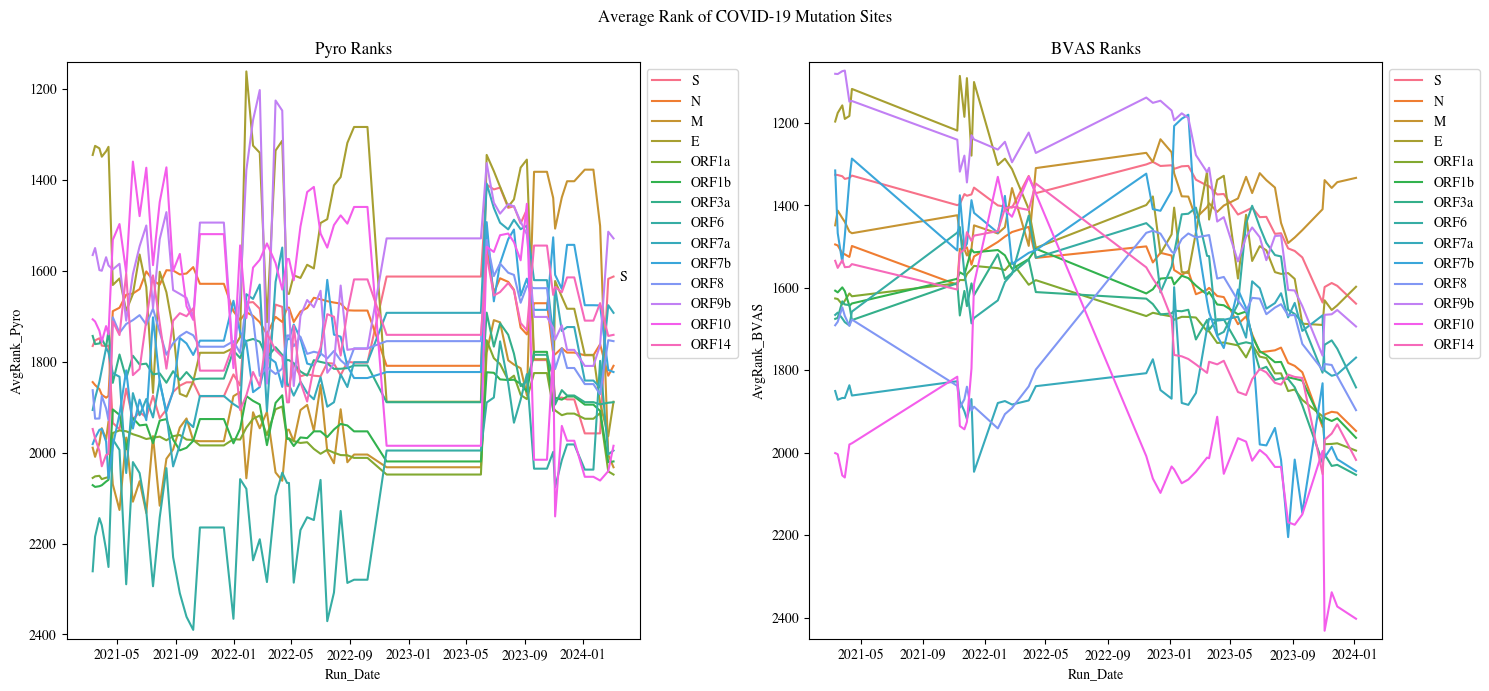

In [13]:

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

sns.lineplot(data = combined_reduced,
                x = "Run_Date",
                y = "AvgRank_Pyro",
                hue = "Site",
                ax=ax[0])
ax[0].set_ylim([max(combined_reduced["AvgRank_Pyro"])+20, min(combined_reduced["AvgRank_Pyro"])-20])
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[0].set_title("Pyro Ranks")

sns.lineplot(data = combined_reduced,
                x = "Run_Date",
                y = "AvgRank_BVAS",
                hue = "Site",
                ax=ax[1])
ax[1].set_ylim([max(combined_reduced["AvgRank_BVAS"])+20, min(combined_reduced["AvgRank_BVAS"])-20])
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[1].set_title("BVAS Ranks")

for index, row in combined_reduced.iterrows():
    if ((row['Run_Date']==max(combined_reduced['Run_Date']))&(row['Site']=='S')):
        ax[0].annotate(f'{row["Site"]}', (row['Run_Date'], row['AvgRank_Pyro']),
                       textcoords="offset points", xytext=(10, -3), ha='right')
        ax[1].annotate(f'{row["Site"]}', (row['Run_Date'], row['AvgRank_BVAS']),
                       textcoords="offset points", xytext=(10, -3), ha='right')

plt.suptitle("Average Rank of COVID-19 Mutation Sites")
plt.tight_layout()

In [14]:
combined_hits = combined[combined["Hits"]==1].reset_index(drop=True)
combined_hits

Run_Date Site Mutation  LogR_Pyro  Growth_Pyro  Rank_Pyro  PIP_BVAS  \
0   2021-03-12    S    L452Q   0.164477      1.17878        9.0  1.000000   
1   2021-03-12    S    L452R   0.158277      1.17149       14.0  1.000000   
2   2021-03-12    S    R346T   0.218388      1.24407        3.0  1.000000   
3   2021-03-12    S    F486V   0.161135      1.17484       12.0  1.000000   
4   2021-03-12    S    L452M   0.203398      1.22556        4.0  1.000000   
..         ...  ...      ...        ...          ...        ...       ...   
487 2021-12-06    S    L452Q        NaN          NaN        NaN  1.000000   
488 2021-12-06    S    F486V        NaN          NaN        NaN  1.000000   
489 2021-12-06    S    L452M        NaN          NaN        NaN  0.999995   
490 2021-12-06    S    L452R        NaN          NaN        NaN  0.997507   
491 2021-12-06    S    E484K        NaN          NaN        NaN  0.014734   

     Beta_BVAS  Rank_BVAS  Hits  AvgRank_Pyro  MaxRank_Pyro  AvgRank_BVAS  \
0     0.483694        4.0     1   1765.619565           2.0   1325.596234   
1     0.391635        1.0     1   1765.619565           2.0   1325.596234   
2     0.595724        2.0     1   1765.619565           2.0   1325.596234   
3     0.516438        8.0     1   1765.619565           2.0   1325.596234   
4     0.462981        5.0     1   1765.619565           2.0   1325.596234   
..         ...        ...   ...           ...           ...           ...   
487   0.458937        3.0     1           NaN           NaN   1373.335417   
488   0.500563        4.0     1           NaN           NaN   1373.335417   
489   0.370028        7.0     1           NaN           NaN   1373.335417   
490   0.241535       10.0     1           NaN           NaN   1373.335417   
491  -0.000147     2760.0     1           NaN           NaN   1373.335417   

     MaxRank_BVAS  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
..            ...  
487           1.0  
488           1.0  
489           1.0  
490           1.0  
491           1.0  

[492 rows x 14 columns]

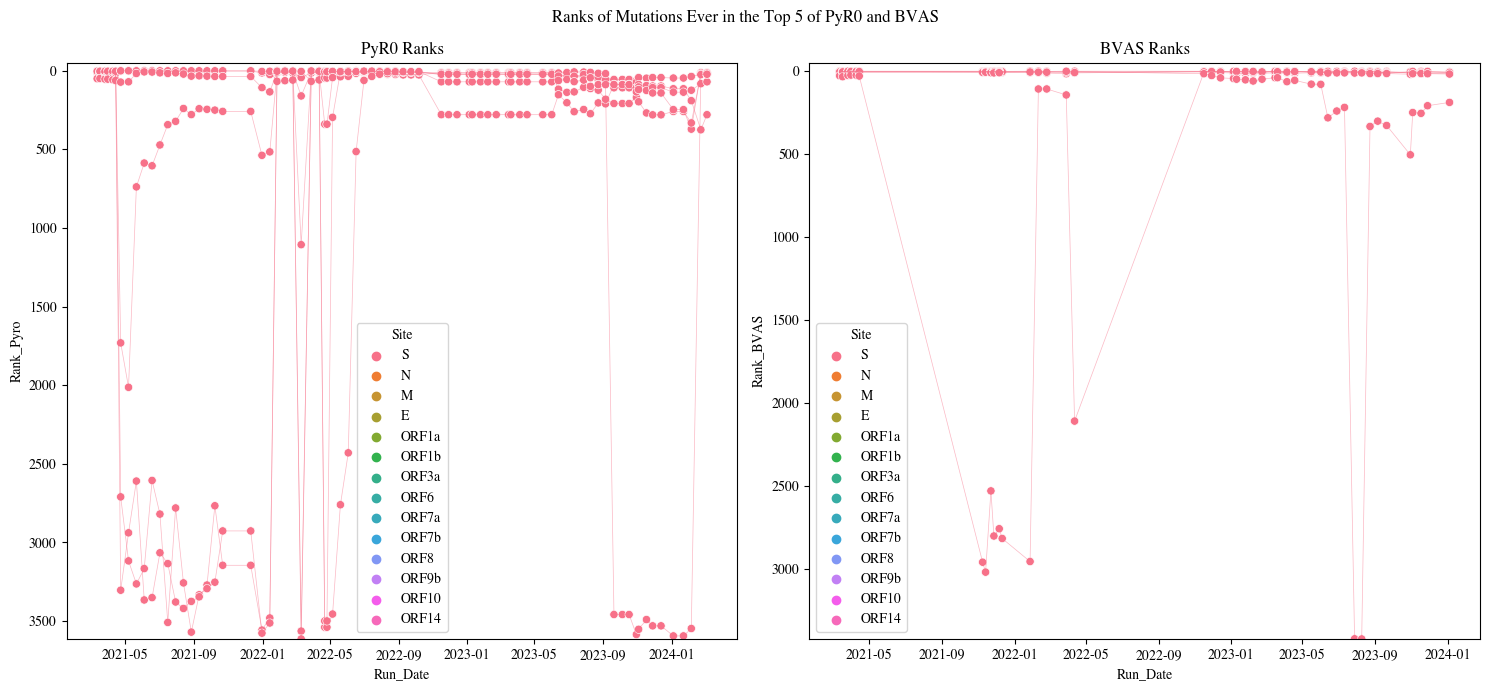

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

sns.scatterplot(data=combined_hits,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Site",
                palette=site_palette,
                ax=ax[0])
sns.lineplot(data=combined_hits,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[0])
ax[0].set_ylim([max(combined_hits["Rank_Pyro"]), -50])
ax[0].set_title("PyR0 Ranks")

sns.scatterplot(data=combined_hits,
                x="Run_Date",
                y="Rank_BVAS",
                hue="Site",
                palette=site_palette,
                ax=ax[1])
sns.lineplot(data=combined_hits,
                x="Run_Date",
                y="Rank_BVAS",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[1])
ax[1].set_ylim([max(combined_hits["Rank_BVAS"]), -50])
ax[1].set_title("BVAS Ranks")

plt.suptitle("Ranks of Mutations Ever in the Top 5 of PyR0 and BVAS")
plt.tight_layout()

/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cis = grouped.apply(bootstrapped_cis)
/Applications/anaconda3/envs/data_analysis_env/lib/python3.11/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

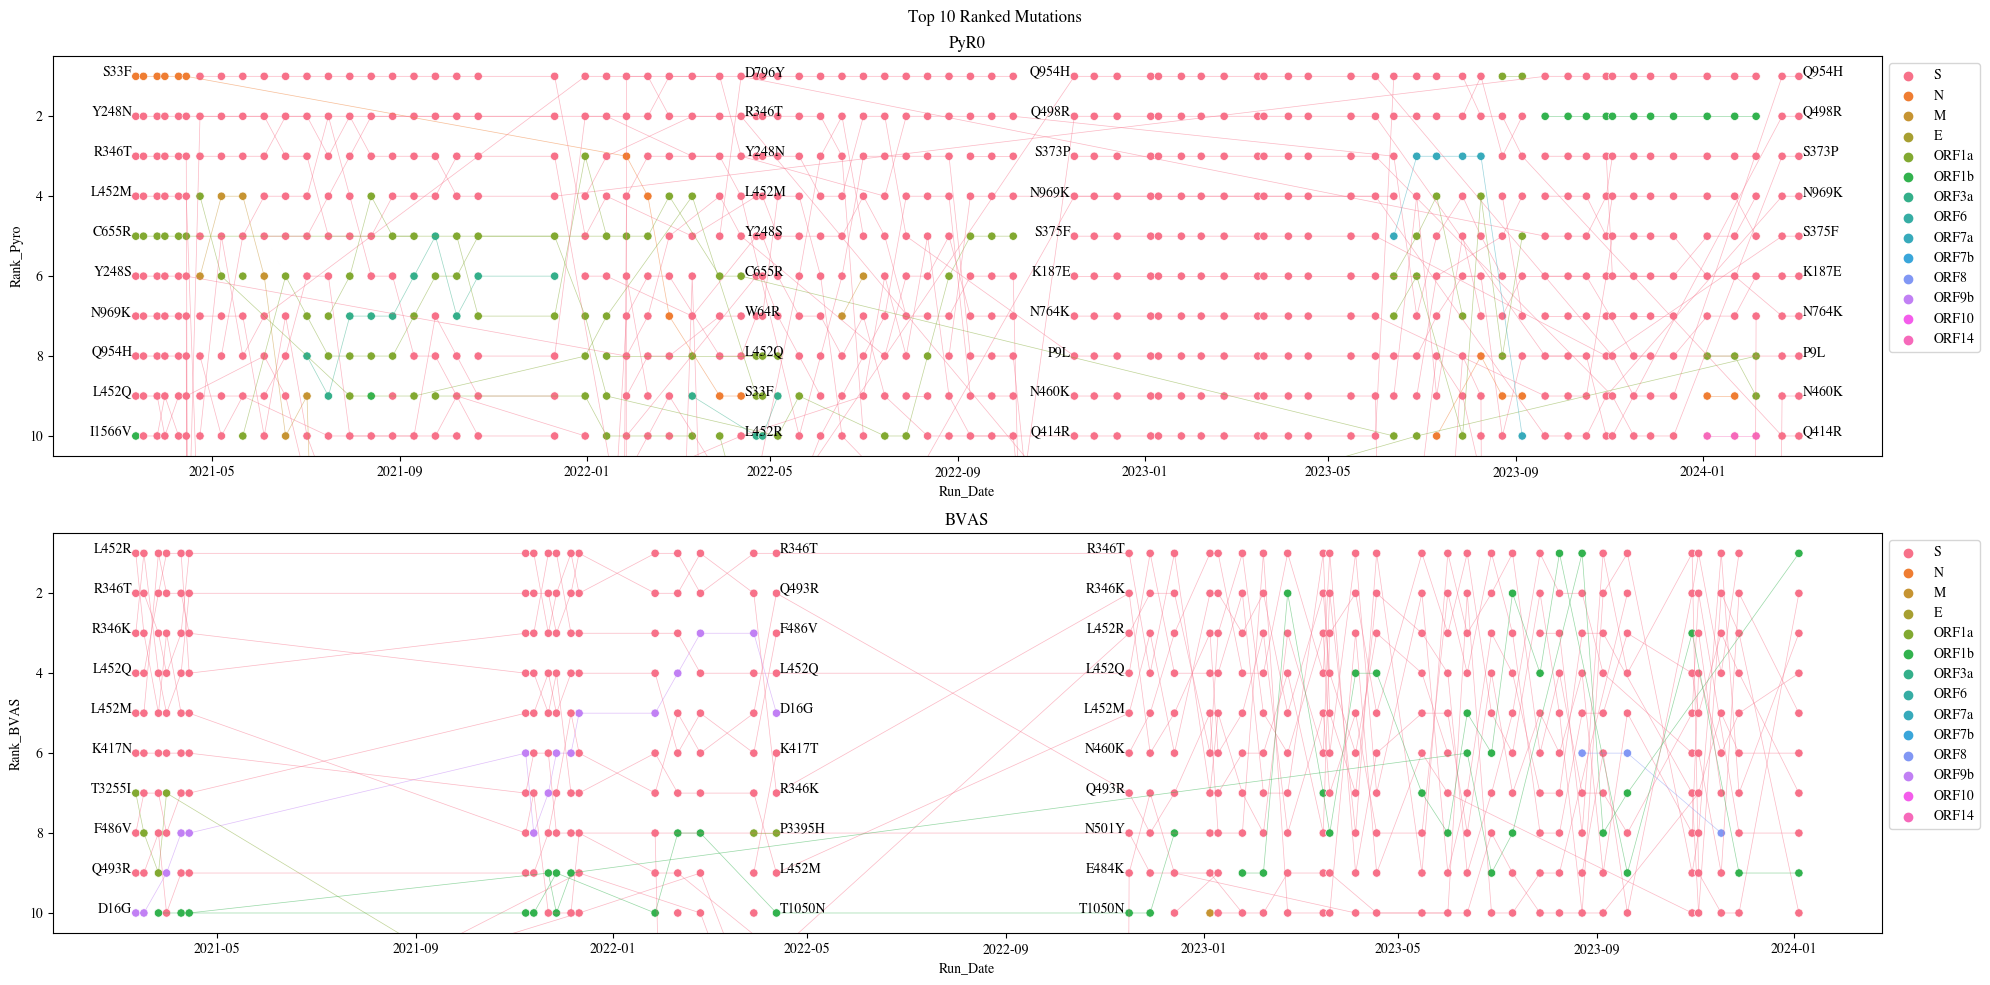

In [16]:
n = 10
combined_10 = combined[(combined["Rank_BVAS"]<=n)|(combined["Rank_Pyro"]<=n)].copy()


fig, ax = plt.subplots(nrows=2, figsize=(20,n))

sns.scatterplot(data=combined_10,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Site",
                palette=site_palette,
                ax=ax[0])
sns.lineplot(data=combined_10,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[0])
ax[0].set_ylim([(n+0.5), 0.5])
ax[0].set_title("PyR0")

for index, row in combined_10.iterrows():
    if (row['Run_Date']==min(combined_10['Run_Date']))|(row['Run_Date']==pd.to_datetime("2022-11-16")):
        ax[0].annotate(f'{row["Mutation"]}', (row['Run_Date'], row['Rank_Pyro']),
                    textcoords="offset points", xytext=(-2.5, 0), ha='right')
    if (row['Run_Date']==max(combined_10['Run_Date']))|(row['Run_Date']==pd.to_datetime("2022-04-12")):
        ax[0].annotate(f'{row["Mutation"]}', (row['Run_Date'], row['Rank_Pyro']),
                    textcoords="offset points", xytext=(2.5, 0), ha='left')
        
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

sns.scatterplot(data=combined_10,
                x="Run_Date",
                y="Rank_BVAS",
                hue="Site",
                palette=site_palette,
                ax=ax[1])
sns.lineplot(data=combined_10,
                x="Run_Date",
                y="Rank_BVAS",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax[1])
ax[1].set_ylim([(n+0.5), 0.5])
ax[1].set_title("BVAS")

for index, row in combined_10.iterrows():
    if (row['Run_Date']==min(combined_10['Run_Date']))|(row['Run_Date']==pd.to_datetime("2022-11-16")):
        ax[1].annotate(f'{row["Mutation"]}', (row['Run_Date'], row['Rank_BVAS']),
                    textcoords="offset points", xytext=(-2.5, 0), ha='right')
    if (row['Run_Date']==max(combined_10['Run_Date']))|(row['Run_Date']==pd.to_datetime("2022-04-12")):
        ax[1].annotate(f'{row["Mutation"]}', (row['Run_Date'], row['Rank_BVAS']),
                    textcoords="offset points", xytext=(2.5, 0), ha='left')
        
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Top 10 Ranked Mutations")
plt.tight_layout()


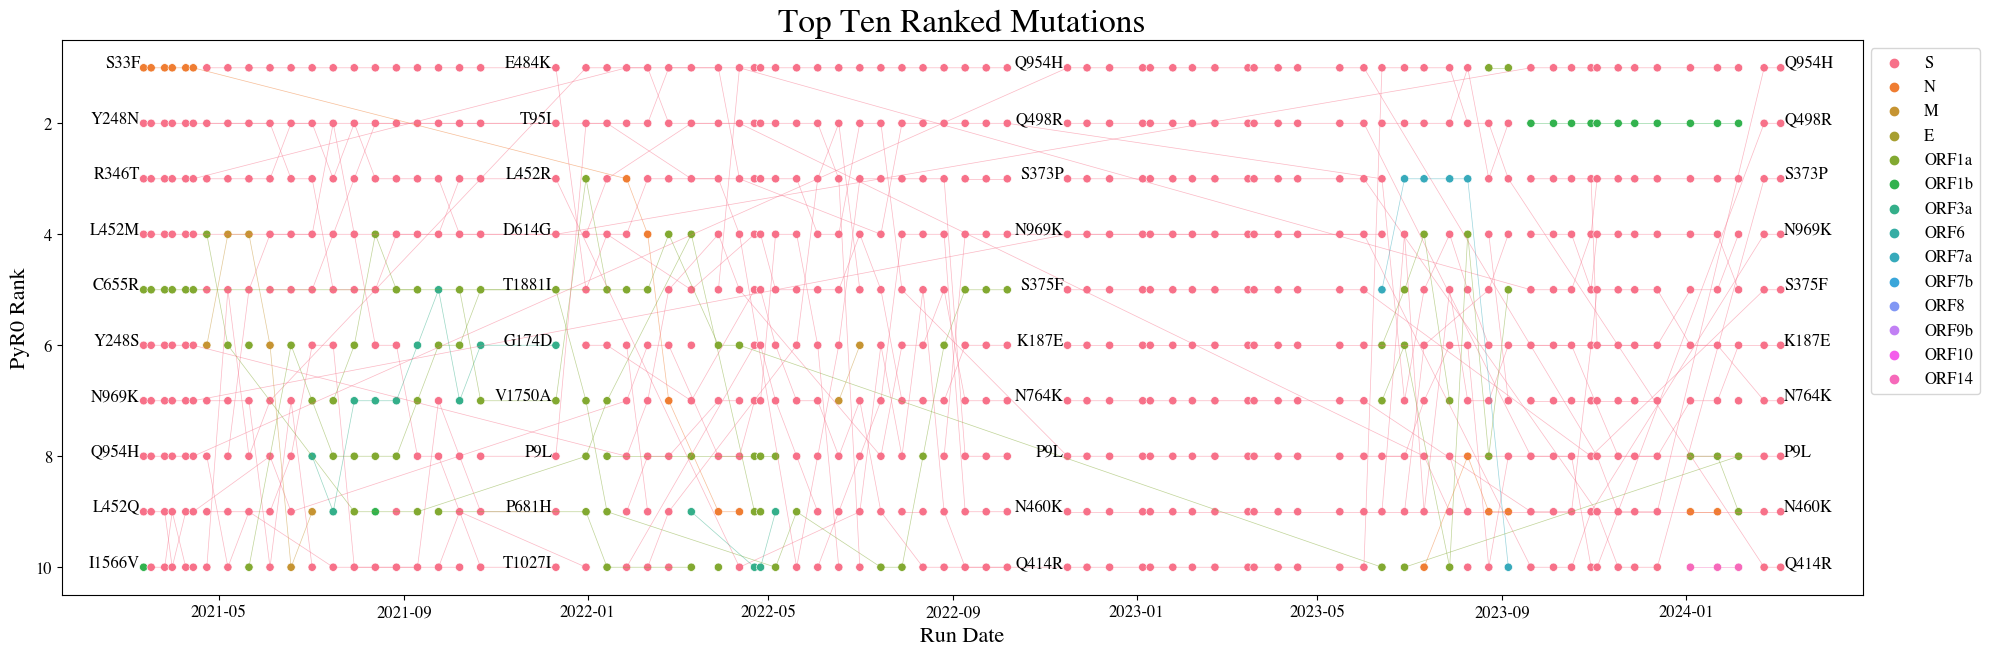

In [26]:
n = 10
combined_10 = combined[(combined["Rank_Pyro"]<=n)].copy()


fig, ax = plt.subplots(figsize=(20,n/1.5))

sns.scatterplot(data=combined_10,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Site",
                palette=site_palette,
                ax=ax)
sns.lineplot(data=combined_10,
                x="Run_Date",
                y="Rank_Pyro",
                hue="Mutation",
                palette=mut_palette,
                alpha=0.5,
                linewidth=0.5,
                legend=False,
                ax=ax)
ax.set_ylim([(n+0.5), 0.5])
ax.set_title("Top Ten Ranked Mutations",
             fontsize=24)
ax.set_xlabel("Run Date",
            fontsize=16)
ax.set_ylabel("PyR0 Rank",
            fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for index, row in combined_10.iterrows():
    if (row['Run_Date']==min(combined_10['Run_Date']))|(row['Run_Date']==pd.to_datetime("2022-11-16"))|(row['Run_Date']==pd.to_datetime("2021-12-11")):
        ax.annotate(f'{row["Mutation"]}', (row['Run_Date'], row['Rank_Pyro']),
                    textcoords="offset points", xytext=(-2.5, 0), ha='right', fontsize=12)
    if (row['Run_Date']==max(combined_10['Run_Date'])):
        ax.annotate(f'{row["Mutation"]}', (row['Run_Date'], row['Rank_Pyro']),
                    textcoords="offset points", xytext=(2.5, 0), ha='left', fontsize=12)
        
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),
          fontsize=12)

plt.tight_layout()


In [37]:
combined_10["Rank_BVAS"].corr(combined_10["Rank_Pyro"])

-0.08989151218199541

In [38]:
combined_hits["Rank_BVAS"].corr(combined_hits["Rank_Pyro"])

-0.007110450159922975

In [39]:
combined_hits["Beta_BVAS"].corr(combined_hits["Growth_Pyro"])

0.47854398273977083

In [40]:
combined["Rank_BVAS"].corr(combined["Rank_Pyro"])

0.1522947421091322

In [41]:
combined["Beta_BVAS"].corr(combined["Growth_Pyro"])

0.5323476831695714

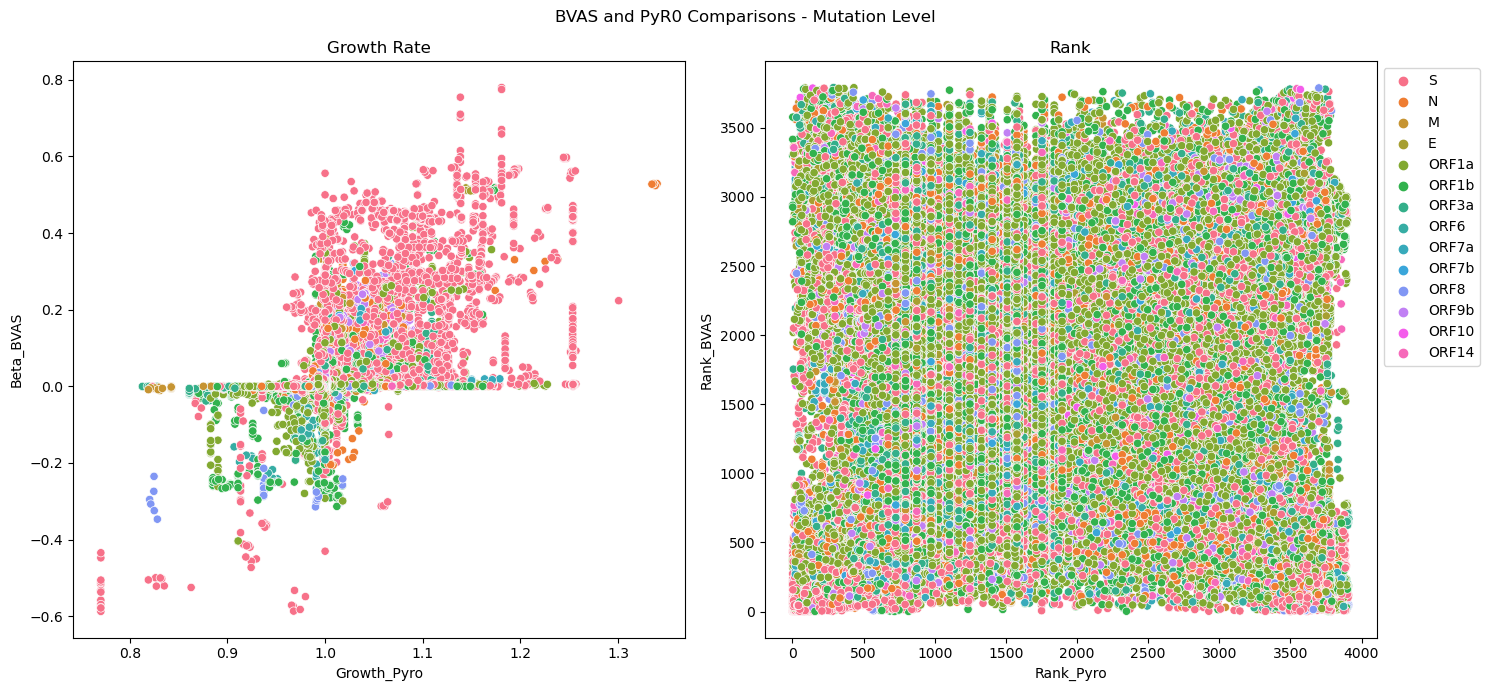

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
sns.scatterplot(data=combined,
                x="Growth_Pyro",
                y="Beta_BVAS",
                hue="Site",
                ax=ax[0],
                legend=False)
ax[0].set_title("Growth Rate")
sns.scatterplot(data=combined,
                x="Rank_Pyro",
                y="Rank_BVAS",
                hue="Site",
                ax=ax[1])
ax[1].set_title("Rank")
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("BVAS and PyR0 Comparisons - Mutation Level")
plt.tight_layout()
                